In [1]:
from notebook_tools import *
%matplotlib inline

Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!


# pp-SRC analysis

In [2]:
columns = ['Q2' , 'Xb' , 'p/q' ,'theta (pq)' , 'Mmiss' ,
           'Pmiss3Mag','pcmX','pcmY','pcmZ' , 'rooWeight' , 
           'prelX','prelY','prelZ',
          'theta (rec-q)' , 'OpeningAngle']
targets = ['C12']#,'Al27','Fe56','Pb208']
colors = ['red','blue','purple','black']
target_names = ['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb'] 
ana_eep = dict()
ana_eepp_no_fid = dict()
for target in targets:
    ana_eep[target] = read_root( "/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_eep_in_ppSRCCut_DATA_%s.root"%target , key='anaTree' , columns=columns  )
    ana_eepp_no_fid[target] = read_root( "/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_ppSRCCut_noFVcuts_DATA_%s.root"%target , key='anaTree' , columns=columns  )

In [4]:
PmissBins = pd.DataFrame()
Neep_tot, Neepp_tot = 0 , 0 
for PmMin,PmMax in zip(np.linspace(0.3,0.9,7),np.linspace(0.4,1.0,7)):
    PmissBins_bin = pd.DataFrame(index=['%d-%d'%(1000*PmMin,1000*PmMax+0.001)])
    for target,target_name in zip(targets,target_names):

        Neepp = len(ana_eepp_no_fid[target][(ana_eepp_no_fid[target]['Pmiss3Mag']>=PmMin)                                                                                                                                     
                                            &(ana_eepp_no_fid[target]['Pmiss3Mag']<PmMax)
                                           ])
        
        Neep = len(ana_eep[target][(ana_eep[target]['Pmiss3Mag']>=PmMin)
                                   &(ana_eep[target]['Pmiss3Mag']<PmMax)
                                  ])
        
        PmissBins_bin[target_name+"$(e,e'p)$"] = Neep - Neepp
        PmissBins_bin[target_name+"$(e,e'pp)$"]= Neepp
        
        Neep_tot += Neep - Neepp
        Neepp_tot += Neepp
        
    PmissBins = PmissBins.append(PmissBins_bin)

PmissBins_bin = pd.DataFrame(index=['total'])
for target,target_name in zip(targets,target_names):
    PmissBins_bin[target_name+"$(e,e'p)$"] = Neep_tot
    PmissBins_bin[target_name+"$(e,e'pp)$"] = Neepp_tot
PmissBins = PmissBins.append(PmissBins_bin)
    
PmissBins

,"$^{12}$C$(e,e'p)$","$^{12}$C$(e,e'pp)$"
300-400,3554,28
400-500,2643,108
500-600,2166,158
600-700,1082,134
700-800,425,83
800-900,157,37
900-1000,51,10
total,10078,558


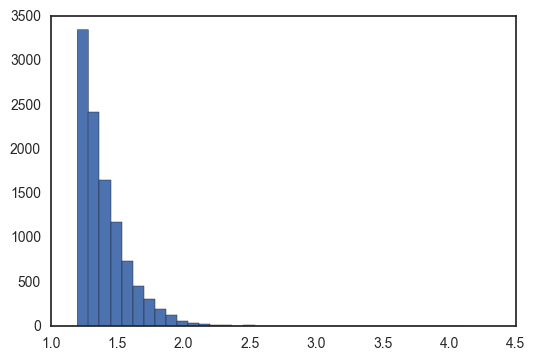

In [96]:
plt.hist(ana_eep['C12'].Xb,bins=35);
# plt.hist(ana_eep['C12'].Pmiss3Mag,bins=35);
# plt.hist(ana_eep['C12'].Mmiss,bins=35);
# plot_2d_hist(ana_eep['C12']['p/q'],ana_eep['C12']['theta (pq)'],bins=35);